In [12]:
import glob
import os

import numpy as np
from PIL import Image
from skimage.io import imread
from tqdm import tqdm
import matplotlib.pyplot as plt

In [13]:
img_height = 352
img_width = 352

image_path = "C:\\jason\\new magang\\DUCK-Net\\kvasir\\images\\cju887ftknop008177nnjt46y.jpg"
mask_path = image_path.replace("images", "masks")

image = imread(image_path)
mask_ = imread(mask_path)

In [14]:
X_train = np.zeros((1, img_height, img_width, 3), dtype=np.float32)
Y_train = np.zeros((1, img_height, img_width), dtype=np.uint8)

In [15]:
mask = np.zeros((img_height, img_width), dtype=np.bool_)

pillow_image = Image.fromarray(image)

pillow_image = pillow_image.resize((img_height, img_width))
image = np.array(pillow_image)

In [16]:
X_train = image / 255

pillow_mask = Image.fromarray(mask_)
pillow_mask = pillow_mask.resize((img_height, img_width), resample=Image.LANCZOS)
mask_ = np.array(pillow_mask)
mask_ = np.mean(mask_, axis=2)

C:\Users\jason\AppData\Local\Temp\ipykernel_30700\1789743192.py:4: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  pillow_mask = pillow_mask.resize((img_height, img_width), resample=Image.LANCZOS)


In [17]:
for i in range(img_height):
    for j in range(img_width):
        if mask_[i, j] >= 127:
                    mask[i, j] = 1

Y_train = mask
Y_train = np.expand_dims(Y_train, axis=-1)

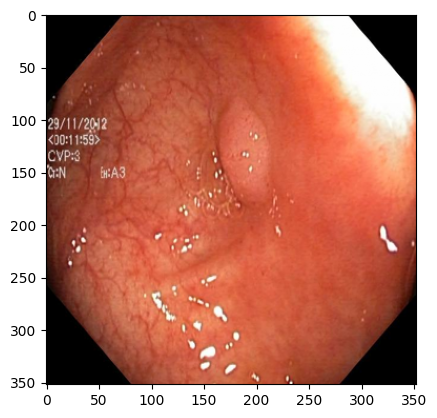

In [18]:
# X_train = X_train.astype("uint8")
plt.imshow(X_train)